[View in Colaboratory](https://colab.research.google.com/github/KUNAL1612/What-is-Cooking-Kaggle/blob/master/cooking.ipynb)

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving sample_submission.csv to sample_submission.csv
Saving test.json to test.json
Saving train.json to train.json
User uploaded file "sample_submission.csv" with length 137045 bytes
User uploaded file "test.json" with length 2844086 bytes
User uploaded file "train.json" with length 12415067 bytes


In [0]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder

In [0]:
data=pd.read_json('train.json')

In [5]:
data.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39774 entries, 0 to 39773
Data columns (total 3 columns):
cuisine        39774 non-null object
id             39774 non-null int64
ingredients    39774 non-null object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


<Container object of 20 artists>

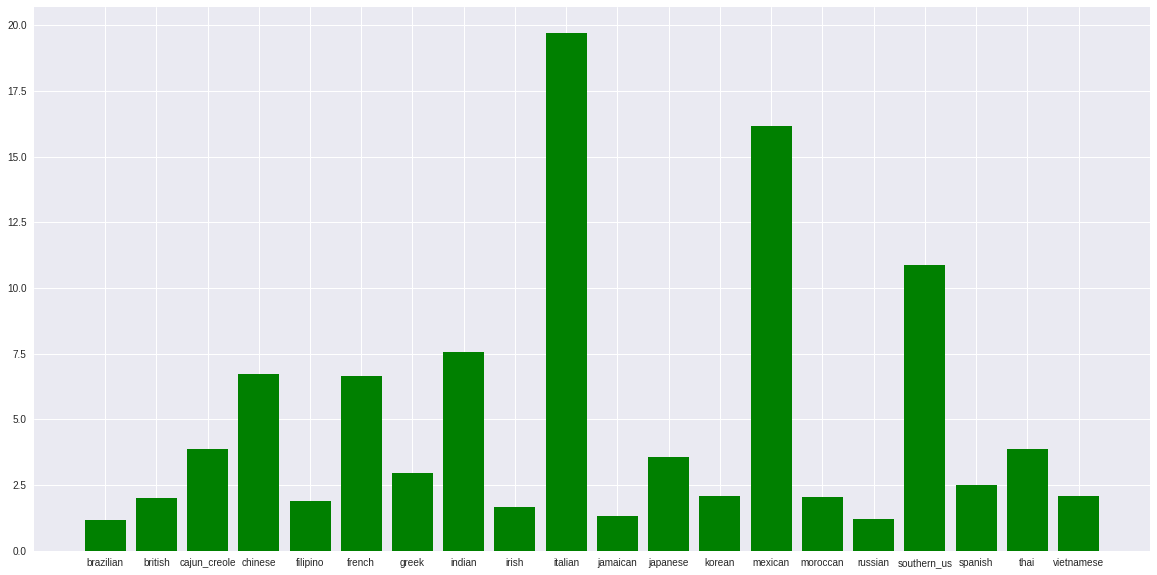

In [7]:
counts=data['cuisine'].value_counts()
counts=counts*100/39774
plt.figure(figsize=(20,10))
plt.bar(counts.index,counts,color='green')


In [0]:
n=6714 #no of different ingredients 

In [0]:
ingredients=Counter([i for sublist in data.ingredients for i in sublist])

In [0]:
ingredients_df = pd.DataFrame.from_dict(ingredients, orient='index').reset_index()

In [11]:
ingredients_df=ingredients_df.rename(columns={'index':'ingredient', 0:'count'})
ingredients_df

,ingredient,count
0,romaine lettuce,270
1,black olives,229
2,grape tomatoes,228
3,garlic,7380
4,pepper,4438
5,purple onion,1896
6,seasoning,137
7,garbanzo beans,148
8,feta cheese crumbles,358
9,plain flour,154


In [0]:
ingredients_df=ingredients_df.sort_values( by='count',ascending=False).reset_index()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


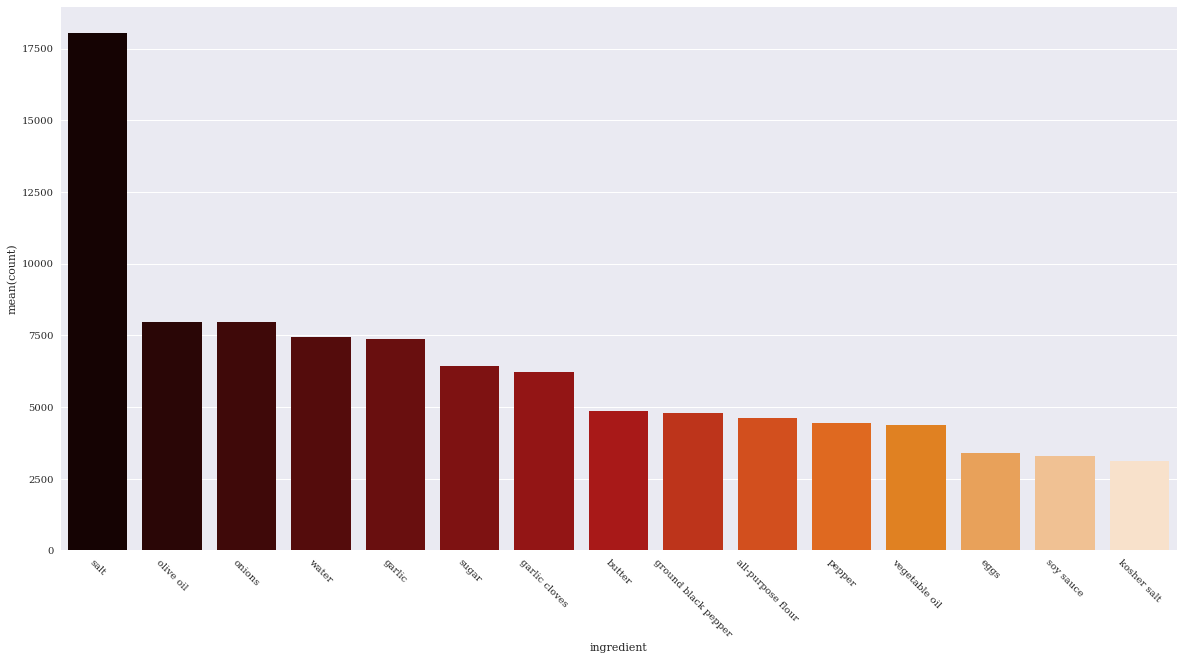

In [13]:
#top 15 most used ingredients
ing=ingredients_df[:15]
plt.figure(figsize=(20,10))
plt.rc('font', family='serif')
sns.barplot(ing['ingredient'],ing['count'],palette='gist_heat')
plt.xticks(rotation=-45)
plt.show()

In [0]:
train=pd.read_json('train.json')
test=pd.read_json('test.json')
y_train=train['cuisine']
l=LabelEncoder()
y_train = l.fit_transform(y_train)



39774